# DT
 - 분산이 큰 모델
 - DT의 단점 중 과적합, 특성 순서를 변경하면 결과도 바뀐단 단점 때문에 분산이 큰 모델
 - 트리 모델도 분류와 예측
 - 분류 모델은 불순도, 예측은 MSE, MAE
 - 불순도: Entropy(log를 사용 => -를 씀), Gini
 - 과적합 방지를 위해 규제 (하이퍼 파라미터)
 - max_depth, max_leaf_nodes, max_features, min_samples_split, min_samples_leaf

### 파이썬 패키지 제어

In [ ]:
import sys
assert sys.version_info >= (3, 7)

In [ ]:
# 한글 지원이 안돼서 나눔폰트 설치
import matplotlib.pyplot as plt
!apt-get update -qq
!apt-get install fonts-nanum* -qq    # 나눔폰트
import matplotlib.font_manager as fm # 아래 위치에 저장됨(나눔고딕으로 저장함)
fe = fm.FontEntry(
    fname = r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', name='NanumBarunGothic')
fm.fontManager.ttflist.insert(0, fe) # fontManager에 ttf 파일 저장
# runtime Configuration
# 글자는 폰트 사이즈별로 폰트 이미지가 있어야함 -> font.family (이걸로 지정)


# plt rc 직접 지정
plt.rcParams.update({'font.size': 18, 'font.family':'NanumBarunGothic'})
plt.rc('figure', figsize =(10,10))
font_option = {'family':'NanumBarunGothic',
               'weight':'bold',
               'size':20}
plt.rc('font', **font_option)

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 124947 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fo

### realtime configuration

In [ ]:
 import matplotlib.pyplot as plt
 plt.rc('font', size = 14)
 plt.rc('axes', labelsize = 14, titlesize = 14)
 plt.rc('legend', fontsize = 14)
 plt.rc('xtick', labelsize = 10)
 plt.rc('ytick', labelsize = 10)

### 문제 1

In [ ]:
# 출력 사이즈를 (8, 6)으로 조정해보시오.
plt.rc('figure', figsize = (8, 6), dpi = 100)

### 경로 제어

In [ ]:
from pathlib import Path

# 현재 경로 (이미 있어도 만들어줌)
IMAGES_PATH = Path() / "images" / "ensembles"
IMAGES_PATH.mkdir(parents = True, exist_ok = True)

# 파일 확장자, 해상도
def save_fig(fig_id, tight_layout = True, fig_extension = "png", resolution = 300):
  path = IMAGES_PATH / f"{fig_id}.{fig_extension}"  # dpi (dot per inch: 프린트 할 때의 해상도)
  if tight_layout:
    plt.tight_layout() # 세팅

  # 메모리 이미지 데이터를 파일로 저장
  plt.savefig(path, format = fig_extension, dpi = resolution)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# 파이프 라인을 함수로 작성 (연속 데이터 처리)
def PolynomialRegression(degree = 2, ** kwargs):
  return make_pipeline(PolynomialFeatures(degree),
                       LinearRegression(**kwargs))

# PolynomialFeatures 다차원으로 데이터 변형
# PolynomialRegression 다항방정식 회귀

In [ ]:
import numpy as np
def make_data(N, err = 1.0, rseed = 1):
  rng = np.random.RandomState(rseed)  # 항상 일정한 데이터를 위해 seed 값을 줌.
  X = rng.rand(N, 1) ** 2  # 랜덤 값의 제곱값
  y = 10 - 1. / (X.ravel() + 0.1)  # 다차원 데이터 -> 1차원 데이터로
  if err > 0:
    y += err * rng.randn(N)  # noise를 포함한 값
  return X, y

X, y = make_data(40)
print(type(X))

<class 'numpy.ndarray'>


In [ ]:
X_test = np.linspace(-0.1, 1.1, 500)[:, None]
print(X_test[:3])

[[-0.1       ]
 [-0.09759519]
 [-0.09519038]]


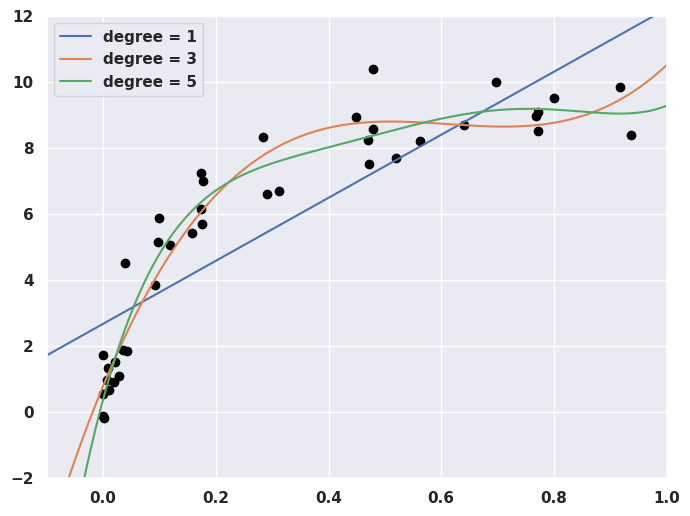

In [ ]:
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

X_test = np.linspace(-0.1, 1.1, 500)[:, None]  # 데이터를 열로 만듦
plt.scatter(X.ravel(), y, color = 'black')
axis = plt.axis()

for degree in [1, 3, 5]:
  y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
  plt.plot(X_test.ravel(), y_test, label = 'degree = {0}'.format(degree))

plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc = 'best')

### hyper parameter tunning

In [ ]:
# hyper parameter tunning
# 파라미터 조합 찾아냄 (검색)
from sklearn.model_selection import GridSearchCV

# __ (언더바 두 개) rule
# 0 ~ 20 -> 21 * 2 * 7
# 인스턴스 이름은 자동으로 소문자
param_grid = {'polynomialfeatures__degree': np.arange(21),
              'linearregression__fit_intercept': [True, False],}

# pipe line도 모델  # estimator로 PolynomialRegression이 들어온 것.
# 전처리를 포함하고 있는 모델을 파이프로 구성해서 전달
grid = GridSearchCV(PolynomialRegression(), param_grid, cv = 7)

In [ ]:
grid.fit(X, y)

GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'linearregression__fit_intercept': [True, False],
                         'polynomialfeatures__degree': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])})

In [ ]:
grid.best_params_

{'linearregression__fit_intercept': False, 'polynomialfeatures__degree': 4}

In [ ]:
grid.cv_results_

{'mean_fit_time': array([0.00194083, 0.00189999, 0.00185858, 0.00182567, 0.00173773,
        0.00197499, 0.00180095, 0.00192751, 0.00197921, 0.00180323,
        0.00189335, 0.00199761, 0.00212339, 0.00201675, 0.00342441,
        0.00164247, 0.00183129, 0.00184577, 0.00172486, 0.00164437,
        0.00167441, 0.00140708, 0.00160105, 0.00137544, 0.00135674,
        0.00144076, 0.00136508, 0.00172721, 0.0016439 , 0.00154754,
        0.00144022, 0.00160067, 0.00198228, 0.00212853, 0.00186406,
        0.00169121, 0.00145691, 0.00140677, 0.00145262, 0.00156791,
        0.00147714, 0.00163375]),
 'std_fit_time': array([3.65041143e-04, 6.25209486e-05, 5.59389214e-05, 7.28106694e-05,
        5.72279598e-05, 4.95010825e-04, 4.14471765e-05, 6.71393851e-05,
        1.52660668e-04, 6.35511821e-05, 1.51267025e-04, 7.49483028e-05,
        1.93828018e-04, 5.13116014e-05, 2.63970083e-03, 8.47841600e-05,
        2.17368418e-04, 3.43654906e-04, 2.24626378e-04, 8.52821815e-05,
        1.75574200e-04, 1.243

In [ ]:
grid.cv_results_['mean_test_score']
len(grid.cv_results_['mean_test_score'])

42

In [ ]:
grid.best_estimator_

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('linearregression', LinearRegression(fit_intercept=False))])

(-0.04687651021505175,
 0.9844070023112612,
 -0.7308177116555796,
 10.902869392322714)

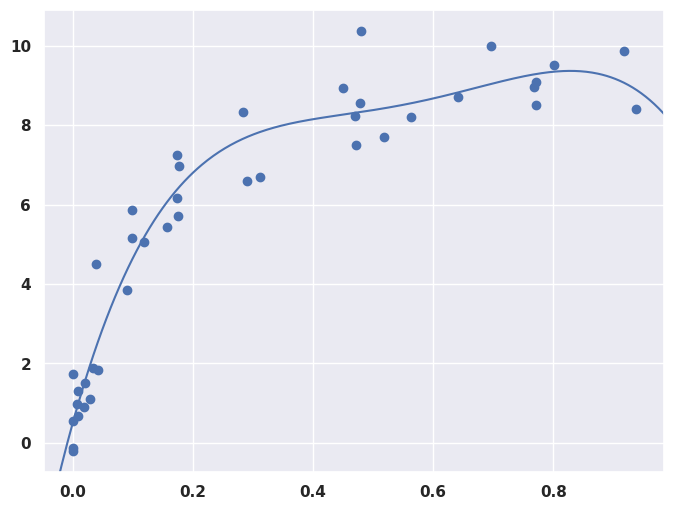

In [ ]:
model = grid.best_estimator_
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test)
plt.axis(lim)

In [ ]:
# pydot: graph 데이터 다룸.
# tree 데이터 -> 단방향
# graphviz -> dot 형식으로 나오게 하는 아이
!apt-get -qq install -y graphviz && pip install -q pydot

In [ ]:
!apt-get install graphviz libgraphviz-dev pkg-config

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pkg-config is already the newest version (0.29.2-1ubuntu3).
graphviz is already the newest version (2.42.2-6ubuntu0.1).
libgraphviz-dev is already the newest version (2.42.2-6ubuntu0.1).
The following packages were automatically installed and are no longer required:
  libbz2-dev libpkgconf3 libreadline-dev
Use 'apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
!pip install pygraphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.0/106.0 kB 2.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pygraphviz: filename=pygraphviz-1.14-cp311-cp311-linux_x86_64.whl size=169680 sha256=d71eaefe57bafcacc7fe27cd4f7146c978921962bdc9a824cff2723dc503e2ec
  Stored in directory: /root/.cache/pip/wheels/9c/5f/df/6fffd2a4353f26dbb0e3672a1baf070c124a1d74a5f9318279
Successfully built pygraphviz


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score # cross_val_score: 평가하는 역할, 모델도 있어야 함.(입력)
from sklearn import tree
import matplotlib.pyplot as plt

# criterion에 gini, entropy, log_loss 들어갈 수 있음.
tree_clf = tree.DecisionTreeClassifier(criterion = 'entropy', random_state=42)  # random_state: 0 -> 42
iris = load_iris()  # bunch 타입

# iris.data: 150 x 4, iris.target: 150 x 1

tree_clf = tree_clf.fit(iris.data, iris.target)

[Text(0.5, 0.9166666666666666, 'x[2] <= 2.45\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.46153846153846156, 0.8333333333333333, 'True  '),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\nentropy = 1.0\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.5384615384615384, 0.8333333333333333, '  False'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\nentropy = 0.445\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\nentropy = 0.146\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'entropy = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\nentropy = 0.918\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text

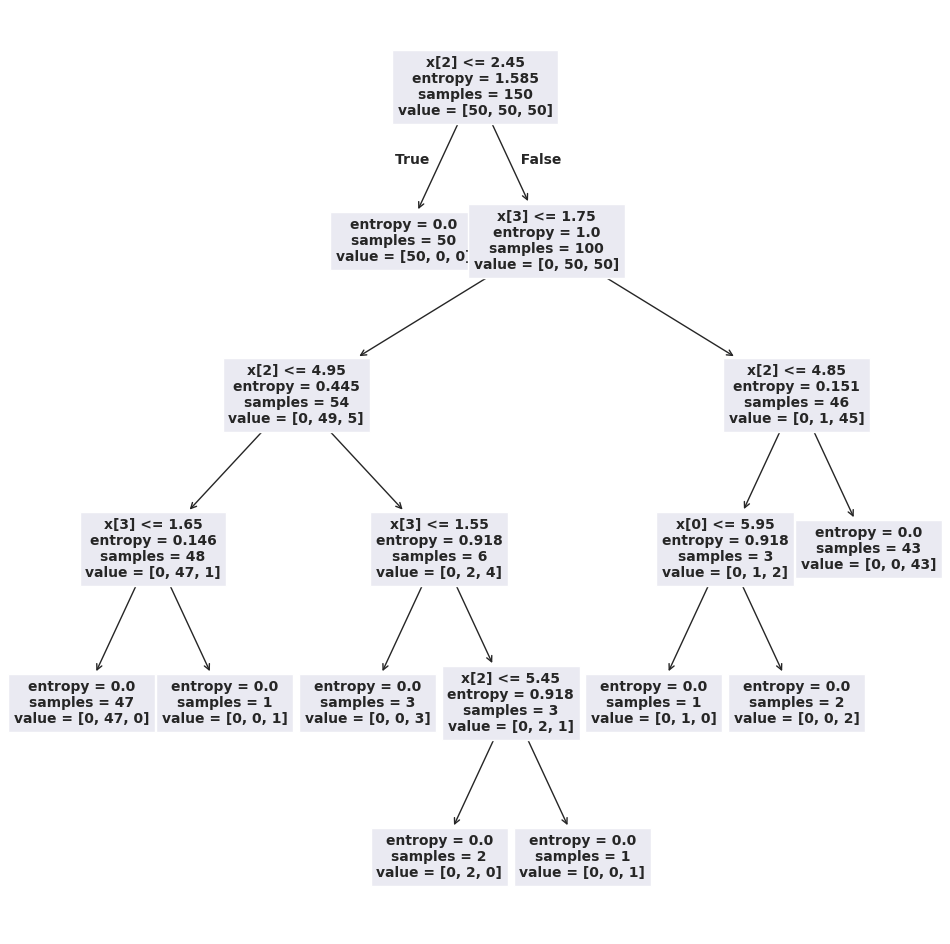

In [ ]:
fig, ax = plt.subplots(figsize = (12, 12))
tree.plot_tree(tree_clf, max_depth = 5, fontsize = 10)

### 불순도 시각화

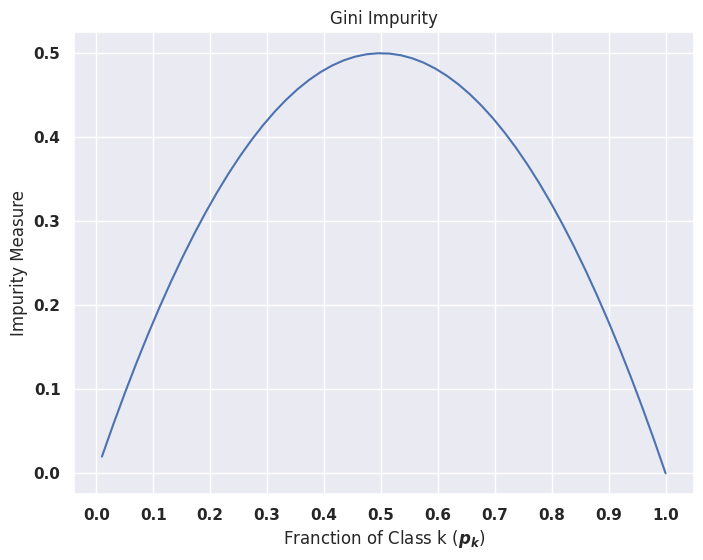

In [ ]:
plt.figure()
x = np.linspace(0.01, 1)
y = 1 - (x*x) - (1-x)*(1-x)
plt.plot(x, y)
plt.title('Gini Impurity')
plt.xlabel('Franction of Class k ($p_k$)')
plt.ylabel('Impurity Measure')
plt.xticks(np.arange(0, 1.1, 0.1))

plt.show()

In [ ]:
- ((50/150) * np.log2(50/150) + (50/150) * np.log2(50/150) + (50/150) * np.log2(50/150))

1.584962500721156

### Entropy

In [ ]:
- ( (50/150) * np.log2(50/150) + (50/150)*np.log2(50/150))

1.0566416671474375

### Jini

In [ ]:
1 - ( (50/150) ** 2 + (50/150) ** 2 + (50/150) ** 2)

0.6666666666666667

### VAL_Score

In [ ]:
cross_val_score(tree_clf, iris.data, iris.target, cv=10)

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.86666667, 0.93333333, 1.        , 1.        , 1.        ])

In [ ]:
cross_val_score(tree_clf, iris.data, iris.target, cv=10).std()  # 분산이 커짐.

0.044221663871405324

### get_params()

In [ ]:
tree_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 0,
 'splitter': 'best'}

In [ ]:
tree_clf.get_depth()

5

In [ ]:
tree_clf.tree_  # 트리 구조

In [ ]:
tree_clf.tree_.node_count

17

In [ ]:
tree_clf.tree_.n_features

4

### 확률로 예측

In [ ]:
tree_clf.predict_proba([[5, 1.5, 2.4, 5.1]]).round(3)

array([[0., 0., 1.]])

In [ ]:
tree_clf.predict([[5, 1.5, 2.4, 5.1]])

array([2])

### Decision Trees Have High Variance
 - 를 갖고있다. 결과값이 달라짐.

### 시각화

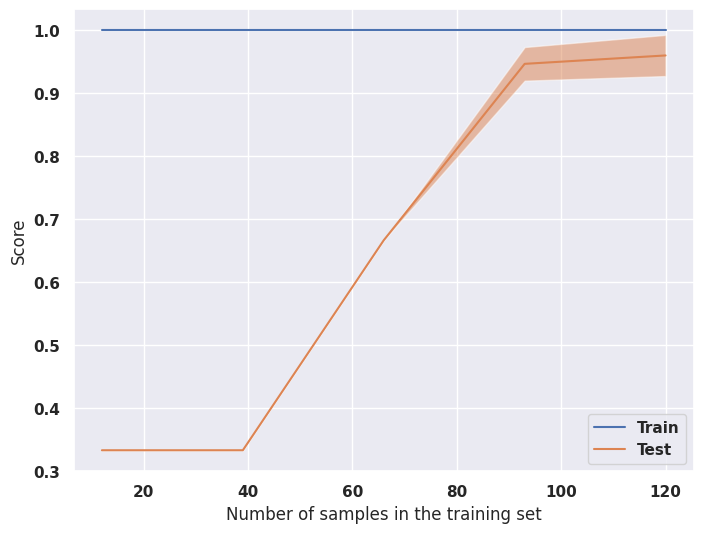

In [ ]:
from sklearn.model_selection import LearningCurveDisplay, learning_curve
from sklearn.tree import DecisionTreeClassifier

X, y = load_iris(return_X_y = True)
tree = DecisionTreeClassifier(random_state = 0)

train_sizes, train_scores, test_scores = learning_curve(
    tree, X, y)

display = LearningCurveDisplay(train_sizes = train_sizes, train_scores = train_scores,
                                test_scores = test_scores, score_name = "Score")

display.plot()
plt.show()

# train은 과적합하고 있다.
# 아직 훈련이 부족하다. -> 더 학습해야 함 (과적합 해소해야 함.)
# 트리에서 과적합 해소: 규제(max_depth, min_samples_leaf)

### 문제 2

In [ ]:
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42
)

In [ ]:
# DecisionTreeClassfier를 이용해서 학습하고, 학습 정확도를 출력하시오.
# accuracy_score, score, cross_val_score을 적용해서 출력하시오.

from sklearn.metrics import accuracy_score

tree_clf = DecisionTreeClassifier(random_state = 42)
tree_clf.fit(X_train, y_train)

y_pred = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(tree_clf.score(X_test, y_test))

from sklearn.model_selection import cross_val_score
cross_val_score(tree_clf, X_test, y_test, cv = 3)


In [ ]:
# 강사님 정답
from sklearn.metrics import accuracy_score

tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train, y_train)
train_accuracy = accuracy_score(y_train, tree_classifier.predict(X_train))

print(f"학습정확도: {train_accuracy}")

학습정확도: 1.0


In [ ]:
y_pred = tree_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f'테스트 정확도: {test_accuracy}')

테스트 정확도: 1.0


In [ ]:
tree_classifier.score(X_test, y_test)

1.0

In [ ]:
cross_val_score(tree_classifier, X_test, y_test, cv=7)

array([1.  , 0.8 , 1.  , 0.75, 1.  , 1.  , 1.  ])

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(tree_classifier,
                out_file = './iris_tree.dot',
                feature_names = ["꽃잎 길이 (cm)", "꽃잎 너비 (cm)",
                                 "꽃받침 길이", "꽃받침의 너비"],
                class_names = iris.target_names,
                rounded = True,  # 곡선으로
                filled = True)  # 컬러를 채워서

### 저장한 파일 형식 그래프로 불러오기

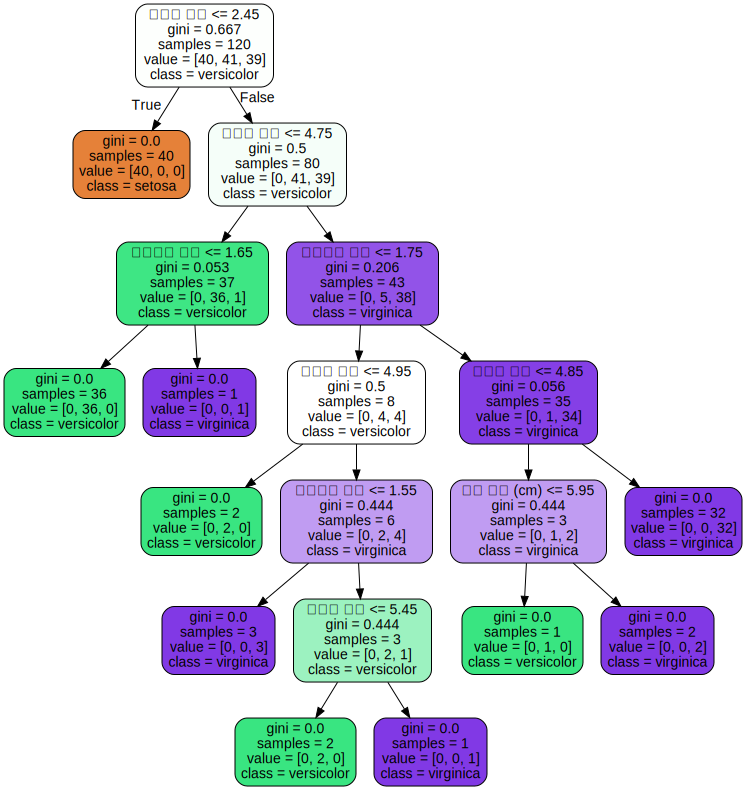

In [ ]:
import graphviz
with open("./iris_tree.dot", encoding = 'UTF8') as f:
  dot_graph = f.read()

dot = graphviz.Source(dot_graph)

dot.format = 'png'
# 3D -> 외형 + 컬러
dot.render(filename = 'iris_tree', directory= './images', cleanup = True)
dot

### 문제 3

In [ ]:
# iris 데이터에 대하여 앞의 2개 변수를(열 선택), DT를 이용해 모델 만들고(fitting) 시각화해보시오.(dot을 이용해서)

In [ ]:
# iris 데이터에 대해서 앞의 2개 변수만 취하라 : 열선택
iris = load_iris()
X = iris.data[:, :2]  # 앞의 두 변수만 선택
y = iris.target


# 모델 생성
tree_classifier = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_classifier.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

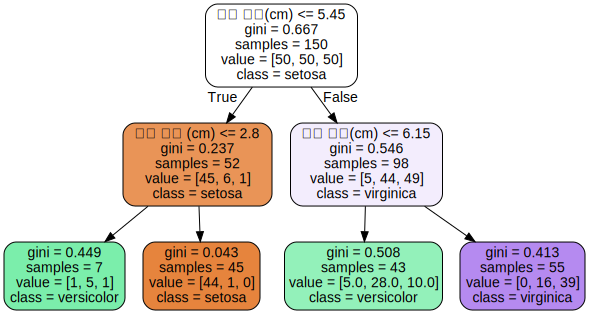

In [ ]:
# 이름 정의 후 저장
export_graphviz(tree_classifier,
                out_file='./iris_tree_2features.dot',
                feature_names=["꽃잎 길이(cm)", "꽃잎 너비 (cm)"],  # 두 변수만 사용
                class_names=iris.target_names,
                rounded=True,
                filled=True)

# 불러오기
with open('./iris_tree_2features.dot', encoding='UTF-8') as f:
    dot_graph = f.read()
dot = graphviz.Source(dot_graph)
dot.format = 'png'
dot.render(filename='iris_tree_2features', directory='./images', cleanup=True)
dot

### 경계선 출력

In [ ]:
from matplotlib.colors import ListedColormap

# 모델, 독립변수, 종속변수, 축의 범위, 데이터 타입
def plot_decision_boundary(clf, X, y, axes = [0, 7.5, 0, 3], iris = True,
                           legend = False, plot_training = True):
  x1s = np.linspace(axes[0], axes[1], 100)  # 첫 번째 축
  x2s = np.linspace(axes[2], axes[3], 100)  # 두 번째 축
  x1, x2 = np.meshgrid(x1s, x2s)  # 조합 grid (100x100)
  print(x1.shape, x2.shape)

  X_new = np.c_[x1.ravel(), x2.ravel()]  # , np.zeros_like(x1.ravel()), np.zeros_like(x1.ravel())]
  y_pred = clf.predict(X_new).reshape(x1.shape)
  custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])

  plt.contour(x1, x2, y_pred, alpha = 0.3, cmap = custom_cmap)  # 등고선
  plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "yo", label = "Iris-Setosa")
  plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "bs", label = "Iris-Versicolor")
  plt.plot(X[:, 0][y == 2], X[:, 1][y == 2], "g^", label = "Iris-Virginica")
  plt.axis(axes)

  plt.xlabel("꽆잎 길이", fontsize = 14)
  plt.ylabel("꽃잎 너비", fontsize = 14)
  plt.legend(loc = "lower right", fontsize = 14)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

# 데이터 로드
iris = datasets.load_iris()
X = iris.data[:, 2:]  # 꽃잎 길이, 꽃잎 너비만 선택
y = iris.target

# 모델 학습
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X, y)

DecisionTreeClassifier()

(100, 100) (100, 100)


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44870 (\N{HANGUL SYLLABLE GGOP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51086 (\N{HANGUL SYLLABLE IP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44600 (\N{HANGUL SYLLABLE GIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44867 (\N{HANGUL SYLLABLE GGOC}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/l

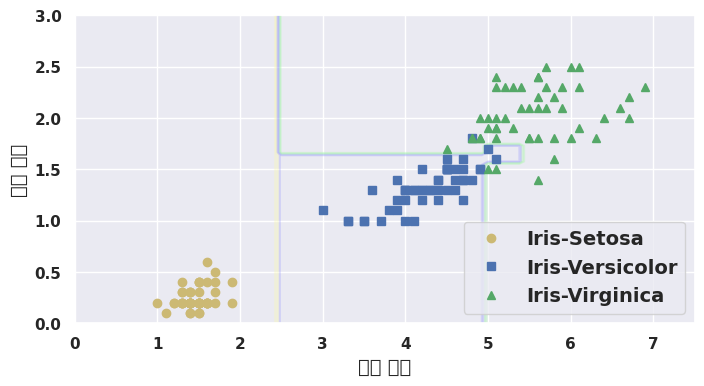

In [ ]:
plt.figure(figsize = (8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.show()

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay

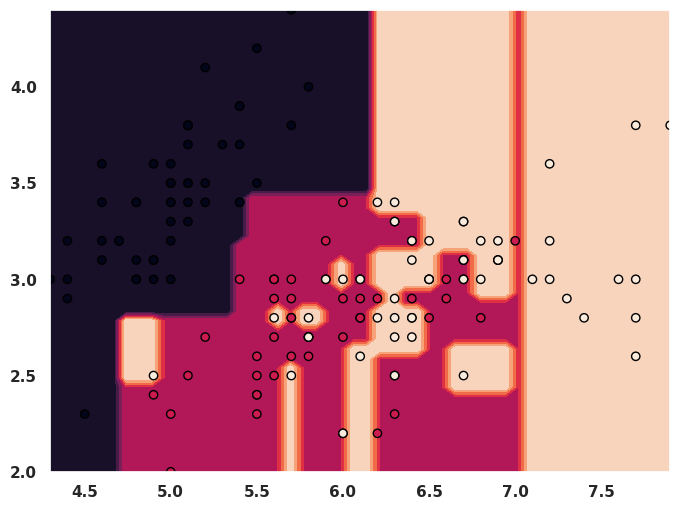

In [ ]:
feature_1, feature_2 = np.meshgrid(
    # 변수가 가질 수 있는 값의 범위를 계산
    np.linspace(iris.data[:, 0].min(), iris.data[:, 0].max()),
    np.linspace(iris.data[:, 1].min(), iris.data[:, 1].max()))

# vertical 수직으로 (2개의 열로)
grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T  # 전치
tree = DecisionTreeClassifier(random_state=42).fit(iris.data[:, :2], iris.target)
y_pred = np.reshape(tree.predict(grid), feature_1.shape)
display = DecisionBoundaryDisplay(
    xx0 = feature_1, xx1 = feature_2, response = y_pred
)

display.plot()
display.ax_.scatter(
    iris.data[:, 0], iris.data[:, 1], c = iris.target, edgecolor = 'black'
)

plt.show()

### 과적합 그림

# 오후 시작

In [ ]:
import pandas as pd

filepath = "/content/drive/MyDrive/미래융합교육원/3월/winequality-red.csv"
df = pd.read_csv(filepath, sep=';', encoding = 'CP949')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
X = df.drop(['quality'], axis = 1)   # 행으로 제거
Y = df['quality']
Y.unique()  # [5, 6, 7, 4, 8, 3]

array([5, 6, 7, 4, 8, 3])

### SVM (Support Vector Machine)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [ ]:
# 파이프 참조 이름  # SVC: Support Vector Classifier -> 최적화
steps = [('scaler', StandardScaler()), ('SVM', SVC())]  # ( ) => 튜플은 변하지 않는다는 의미 (조합으로 넣을 때)
pipeline = Pipeline(steps)

# C -> 규제 이름, gamma -> 초평면의 모양 제어
parameteres = {'SVM__C': [7, 8, 9, 10, 11], 'SVM__gamma':[0.1, 0.01]}

# stratify -> 층화추출 (종속변수의 비율이 같게 샘플을 추출함.)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 30, stratify = Y)


grid = GridSearchCV(pipeline, param_grid = parameteres, cv = 5)
grid.fit(X_train, y_train)
print("score = %3.2f" % (grid.score(X_test, y_test)))
print(grid.best_params_)

score = 0.67
{'SVM__C': 9, 'SVM__gamma': 0.1}


In [ ]:
# accuracy_score() 적용
from sklearn.metrics import accuracy_score

accuracy_score(y_test, grid.predict(X_test))


0.671875

In [ ]:
# cross_val_score() 결정
from sklearn.model_selection import cross_val_score

# 모델 넣고, 예측 값, 실제 값 넣기
cross_val_score(grid, X_test, y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklea

array([0.640625, 0.515625, 0.609375, 0.5625  , 0.671875])

In [ ]:
pd.Series(y_train).value_counts(normalize=True)

,proportion
quality,
5,0.426114
6,0.398749
7,0.124316
4,0.032838
8,0.011728
3,0.006255


In [ ]:
pd.Series(y_test).value_counts(normalize=True)

,proportion
quality,
5,0.425000
6,0.400000
7,0.125000
4,0.034375
8,0.009375
3,0.006250


In [ ]:
grid.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('SVM', SVC(C=9, gamma=0.1))])

### RandomizedSearchCV
 - uniform -> 균등 분포
 - randint -> 이산적 수치의 균등 분포

In [ ]:
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    'SVM__C': uniform(loc = 7, scale = 4),  # 연속적 수치에 대해 7부터 시작해서 11까지의 균등분포를 이야기함.
    'SVM__gamma': uniform(loc = 0.001, scale = 0.1)  # 0.001 ~ 0.101까지의 균등분포
}

random_search = RandomizedSearchCV(pipeline, param_distributions=param_distributions, n_iter=10, cv=5,
                                   random_state=42, n_jobs = -1)  # n_iter: 반복 횟수 # n_jobs = -1: 전체 코어를 사용
random_search.fit(X_train, y_train)
print("score = %3.2f" % (random_search.score(X_test, y_test)))
print(random_search.best_params_)

score = 0.68
{'SVM__C': 7.08233797718321, 'SVM__gamma': 0.09799098521619944}


### 대용량 데이터인 경우
 - 초기에는 작은 sampling된 데이터에 파라미터 튜닝을 함.
 - 결과가 안 좋은 데이터들이 제거 됨.
 - max_resources: 최종단계에서 사용할 샘플 수
 - factor: 늘려가는 배수가 factor 배수만큼 샘플을 증가시켜 테스트한다. (ex. 3배만큼 하겠다.)

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

halving_random_search = HalvingRandomSearchCV(pipeline,
                                              param_distributions = param_distributions,
                                              resource = 'n_samples', max_resources = len(X_train),
                                              factor = 3, cv = 5, random_state = 42, n_jobs = -1)

halving_random_search.fit(X_train, y_train)

print("score = %3.2f" % (halving_random_search.score(X_test, y_test)))
print(halving_random_search.best_params_)

score = 0.59
{'SVM__C': 9.36965827544817, 'SVM__gamma': 0.0056450412719997725}


### Basian Optimization에서 제공하는 optuna

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 6.2 MB/s eta 0:00:00


In [ ]:
# optuna는 외부 객체  # 모델까지 전달 (모델 자체를 함수화)
# 리턴: 파라미터 조합만 리턴
import optuna

def objective(trial):  # trial은 optuna가 전달할 파라미터 조합
  C = trial.suggest_float('C', 7, 11)  # 값의 범위를 제안
  gamma = trial.suggest_float('gamma', 0.01, 0.1)

  steps = [("scalar", StandardScaler()), ('SVM', SVC(C = C, gamma = gamma))]

  pipeline = Pipeline(steps)
  pipeline.fit(X_train, y_train)
  y_pred = pipeline.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)  # 예측까지
  return accuracy  # 정확도를 리턴  # 만약 MSE를 리턴하면

# optuna: 함수를 최적화 함 -> 목적함수를 작성
study = optuna.create_study(direction='maximize')  # 정확도를 최대화

# 함수를 최적화 (목적함수를 작성)
study.optimize(objective, n_trials = 100)

print("Best trial:")
trial = study.best_trial  # 가장 좋은 파라미터 조합이 리턴 됨.

print("Value: {}".format(trial.value))
print("Params: ")

for key, value in trial.params.items():
  print("  {}: {}".format(key, value))

[I 2025-03-05 06:09:23,141] A new study created in memory with name: no-name-83cc06a0-1552-484f-9b68-263a84672e9e
[I 2025-03-05 06:09:23,384] Trial 0 finished with value: 0.675 and parameters: {'C': 7.66050912583573, 'gamma': 0.09388829555699146}. Best is trial 0 with value: 0.675.
[I 2025-03-05 06:09:23,616] Trial 1 finished with value: 0.640625 and parameters: {'C': 10.293409193781123, 'gamma': 0.056537045746995036}. Best is trial 0 with value: 0.675.
[I 2025-03-05 06:09:23,845] Trial 2 finished with value: 0.63125 and parameters: {'C': 8.197190366987723, 'gamma': 0.05389348306693982}. Best is trial 0 with value: 0.675.
[I 2025-03-05 06:09:24,185] Trial 3 finished with value: 0.65 and parameters: {'C': 8.195005176746884, 'gamma': 0.04284311811465288}. Best is trial 0 with value: 0.675.
[I 2025-03-05 06:09:24,435] Trial 4 finished with value: 0.671875 and parameters: {'C': 8.792600239841677, 'gamma': 0.085228645410986}. Best is trial 0 with value: 0.675.
[I 2025-03-05 06:09:24,660] Tr

Best trial:
Value: 0.678125
Params: 
  C: 7.474965365245998
  gamma: 0.09972489802890143


### 모델

In [ ]:
best_steps = [('scaler', StandardScaler()),
              ('SVM', SVC(C = trial.params['C'], gamma = trial.params['gamma']))]

best_pipeline = Pipeline(best_steps)
best_pipeline.fit(X_train, y_train)
best_accuracy = best_pipeline.score(X_test, y_test)
print("Best Pipeline Accuracy (Test): %3.2f" % best_accuracy)

Best Pipeline Accuracy (Test): 0.68


### 문제 4

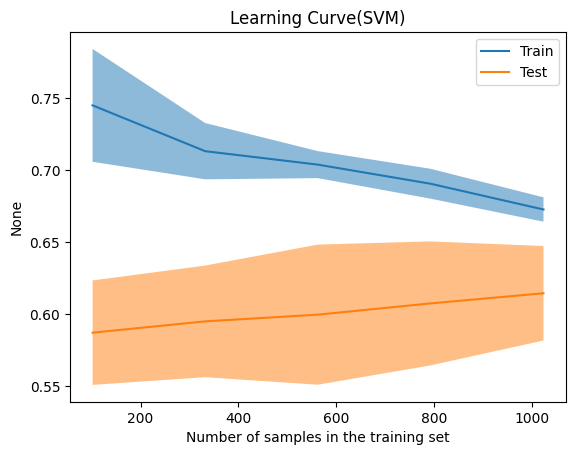

In [ ]:
# 학습곡선을 출력하시오.
from sklearn.model_selection import LearningCurveDisplay, learning_curve
from sklearn.svm import SVC
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(
    pipeline, X_train, y_train, cv = 5, scoring = 'accuracy', n_jobs = -1
)

LearningCurveDisplay(train_sizes = train_sizes, train_scores = train_scores,
                     test_scores = test_scores).plot()
plt.title('Learning Curve(SVM)')
plt.show()

### 분류/예측 문제를 하나 정해서 조가 협조하여 모델을 만들고 제출 (팀장)
 - 주제 결정은 같이 (간단하게 역할 분담)
 - Decision Tree만 사용 (parameter 튜닝은 꼭)

In [ ]:
import seaborn as sns
df = sns.load_dataset("penguins")

In [ ]:
df.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [ ]:
# 정확도, 재현율, 정밀도, 평균에러오차 mse 까지는 확인하는 걸로
# Decision Tree 사용
# Entropy

In [ ]:
# 1 데이터 전처리
# 결측치 제거
df.dropna(inplace=True)

# 서식지(island) 열 제거
df.drop(columns=['island'], inplace=True)

# 범주형 데이터를 수치형으로 변환
df['sex'] = df['sex'].map({'Male': 0, 'Female': 1})
df['species'] = df['species'].map({'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2})

# 데이터 분할
X = df.drop(columns=['species'])  # 독립 변수
y = df['species']  # 종(species)을 예측

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2 최적의 max_depth 찾기
best_score = 0
best_params = {}

for max_depth in range(2, 11):  # 최대 깊이 2~10 탐색
    for min_samples_split in range(2, 6):  # 최소 샘플 분할 2~5 탐색
        dt = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, min_samples_split=min_samples_split, random_state=42)
        dt.fit(X_train, y_train)
        y_pred = dt.predict(X_test)

        # 성능 평가
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='macro')
        recall = recall_score(y_test, y_pred, average='macro')
        mse = mean_squared_error(y_test, y_pred)

        # 최적 모델 저장
        if accuracy > best_score:
            best_score = accuracy
            best_params = {
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'accuracy': accuracy,
                'precision': precision,
                'recall': recall,
                'mse': mse
            }

# 최적 파라미터 및 성능 출력
best_params


In [ ]:
# optuna는 외부 객체  # 모델까지 전달 (모델 자체를 함수화)
# 리턴: 파라미터 조합만 리턴
import optuna

def objective(trial):  # trial은 optuna가 전달할 파라미터 조합
  C = trial.suggest_float('C', 7, 11)  # 값의 범위를 제안
  gamma = trial.suggest_float('gamma', 0.01, 0.1)

  steps = [("scalar", StandardScaler()), ('SVM', SVC(C = C, gamma = gamma))]

  pipeline = Pipeline(steps)
  pipeline.fit(X_train, y_train)
  y_pred = pipeline.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)  # 예측까지
  return accuracy  # 정확도를 리턴  # 만약 MSE를 리턴하면

# optuna: 함수를 최적화 함 -> 목적함수를 작성
study = optuna.create_study(direction='maximize')  # 정확도를 최대화

# 함수를 최적화 (목적함수를 작성)
study.optimize(objective, n_trials = 100)

print("Best trial:")
trial = study.best_trial  # 가장 좋은 파라미터 조합이 리턴 됨.

print("Value: {}".format(trial.value))
print("Params: ")

for key, value in trial.params.items():
  print("  {}: {}".format(key, value))

In [ ]:
best_steps = [('scaler', StandardScaler()),
              ('SVM', SVC(C = trial.params['C'], gamma = trial.params['gamma']))]

best_pipeline = Pipeline(best_steps)
best_pipeline.fit(X_train, y_train)
best_accuracy = best_pipeline.score(X_test, y_test)
print("Best Pipeline Accuracy (Test): %3.2f" % best_accuracy)

In [ ]:
# accuracy_score() 적용
from sklearn.metrics import accuracy_score

accuracy_score(y_test, grid.predict(X_test))
